In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import torch
from torch import nn, optim
from torch.utils.data import DataLoader, Dataset
from tqdm import tqdm, trange
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [2]:
def preprocess(data, seq_len):
    ori_data = data[::-1]
    scaler = MinMaxScaler().fit(ori_data)
    ori_data = scaler.transform(ori_data)
    
    temp_data = []
    for i in range(0, len(ori_data) - seq_len):
        _x = ori_data[i:i + seq_len]
        temp_data.append(_x)
        
    idx = np.random.permutation(len(temp_data))
    data = [temp_data[i] for i in idx]
    return np.array(data)


In [3]:
path_input="output_stock/"

In [4]:
synthetic_sample_raw=pd.read_csv(path_input+"synthetic_sample.csv")
real_sample_raw=pd.read_csv(path_input+"real_sample.csv")


In [5]:
print(real_sample_raw.shape)
real_sample_raw.head()

(23999, 6)


,3.908968337365849588e-01,3.946187826853650993e-01,3.960144479718795685e-01,3.915741746249320476e-01,3.915741746249320476e-01.1,2.152846416514218181e-02
0,0.382724,0.389375,0.388798,0.390832,0.390832,0.015385
1,0.384100,0.382888,0.387024,0.384115,0.384115,0.017900
2,0.387608,0.386197,0.388663,0.383585,0.383585,0.020555
3,0.393551,0.391993,0.395178,0.389028,0.389028,0.014344
4,0.391833,0.394489,0.398672,0.394284,0.394284,0.019937


In [6]:
print(synthetic_sample_raw.shape)
synthetic_sample_raw.head()

(23999, 6)


,5.127797722816467285e-01,5.154030919075012207e-01,5.241351723670959473e-01,5.164988040924072266e-01,5.180779099464416504e-01,1.841846480965614319e-02
0,0.496797,0.501007,0.507147,0.501613,0.503090,0.012699
1,0.486371,0.489399,0.493044,0.489321,0.490059,0.021211
2,0.487200,0.488216,0.493814,0.489350,0.488438,0.016593
3,0.498651,0.498241,0.504337,0.498966,0.497485,0.014071
4,0.504262,0.504029,0.510686,0.505388,0.503761,0.013518


In [7]:
[sample_size,n_seq] = real_sample_raw.shape
print(real_sample_raw.shape)
seq_len = n_seq*4

(23999, 6)


In [8]:
pre_real_sample= preprocess(real_sample_raw, seq_len)
pre_synthetic_sample= preprocess(synthetic_sample_raw, seq_len)


Visualization

In [9]:
sample_size = 250
idx = np.random.permutation(len(pre_real_sample))[:sample_size]
real_sample = np.asarray(pre_real_sample)[idx]
idx = np.random.permutation(len(pre_synthetic_sample))[:sample_size]
synthetic_sample = np.asarray(pre_synthetic_sample)[idx]

In [10]:
real_sample_reduced=real_sample.reshape(-1,seq_len)
synthetic_sample_reduced=synthetic_sample.reshape(-1,seq_len)

In [11]:
print(real_sample_reduced.shape)
print(synthetic_sample_reduced.shape)

(1500, 24)
(1500, 24)


In [12]:
n_components = 2
pca = PCA(n_components=n_components)
tsne = TSNE(n_components=n_components, n_iter=300)

#The fit of the methods must be done only using the real sequential data
pca.fit(real_sample_reduced)

pca_real = pd.DataFrame(pca.transform(real_sample_reduced))
pca_synth = pd.DataFrame(pca.transform(synthetic_sample_reduced))

data_reduced = np.concatenate((real_sample_reduced, synthetic_sample_reduced), axis=0)
tsne_results = pd.DataFrame(tsne.fit_transform(data_reduced))



Text(0.5, 0.98, 'Validating synthetic vs real data diversity and distributions')

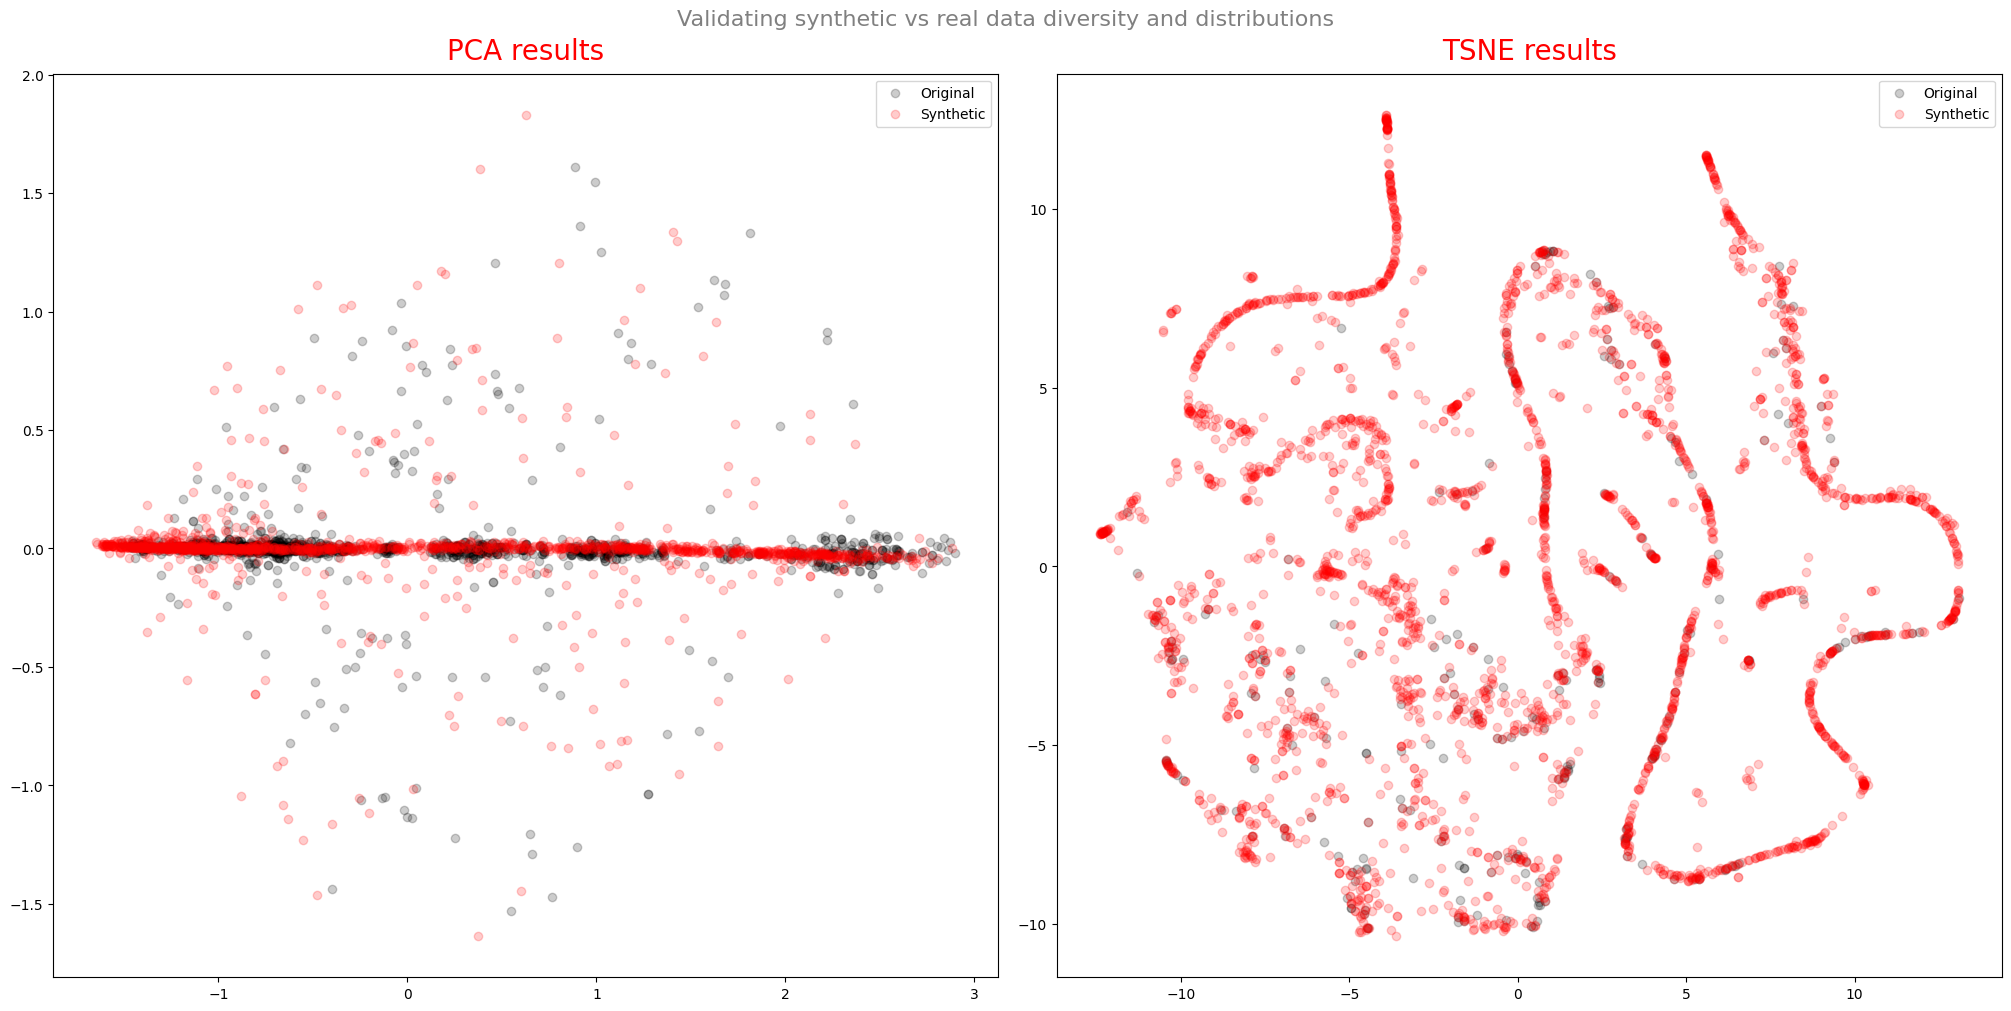

In [13]:
fig = plt.figure(constrained_layout=True, figsize=(20,10))
spec = gridspec.GridSpec(ncols=2, nrows=1, figure=fig)

#TSNE scatter plot
ax = fig.add_subplot(spec[0,0])
ax.set_title('PCA results',
             fontsize=20,
             color='red',
             pad=10)

#PCA scatter plot
plt.scatter(pca_real.iloc[:, 0].values, pca_real.iloc[:,1].values,
            c='black', alpha=0.2, label='Original')
plt.scatter(pca_synth.iloc[:,0], pca_synth.iloc[:,1],
            c='red', alpha=0.2, label='Synthetic')
ax.legend()

ax2 = fig.add_subplot(spec[0,1])
ax2.set_title('TSNE results',
              fontsize=20,
              color='red',
              pad=10)

plt.scatter(tsne_results.iloc[:sample_size, 0].values, tsne_results.iloc[:sample_size,1].values,
            c='black', alpha=0.2, label='Original')
plt.scatter(tsne_results.iloc[sample_size:,0], tsne_results.iloc[sample_size:,1],
            c='red', alpha=0.2, label='Synthetic')

ax2.legend()

fig.suptitle('Validating synthetic vs real data diversity and distributions',
             fontsize=16,
             color='grey')

Text(0.5, 0.98, 'Validating synthetic vs real data diversity and distributions')

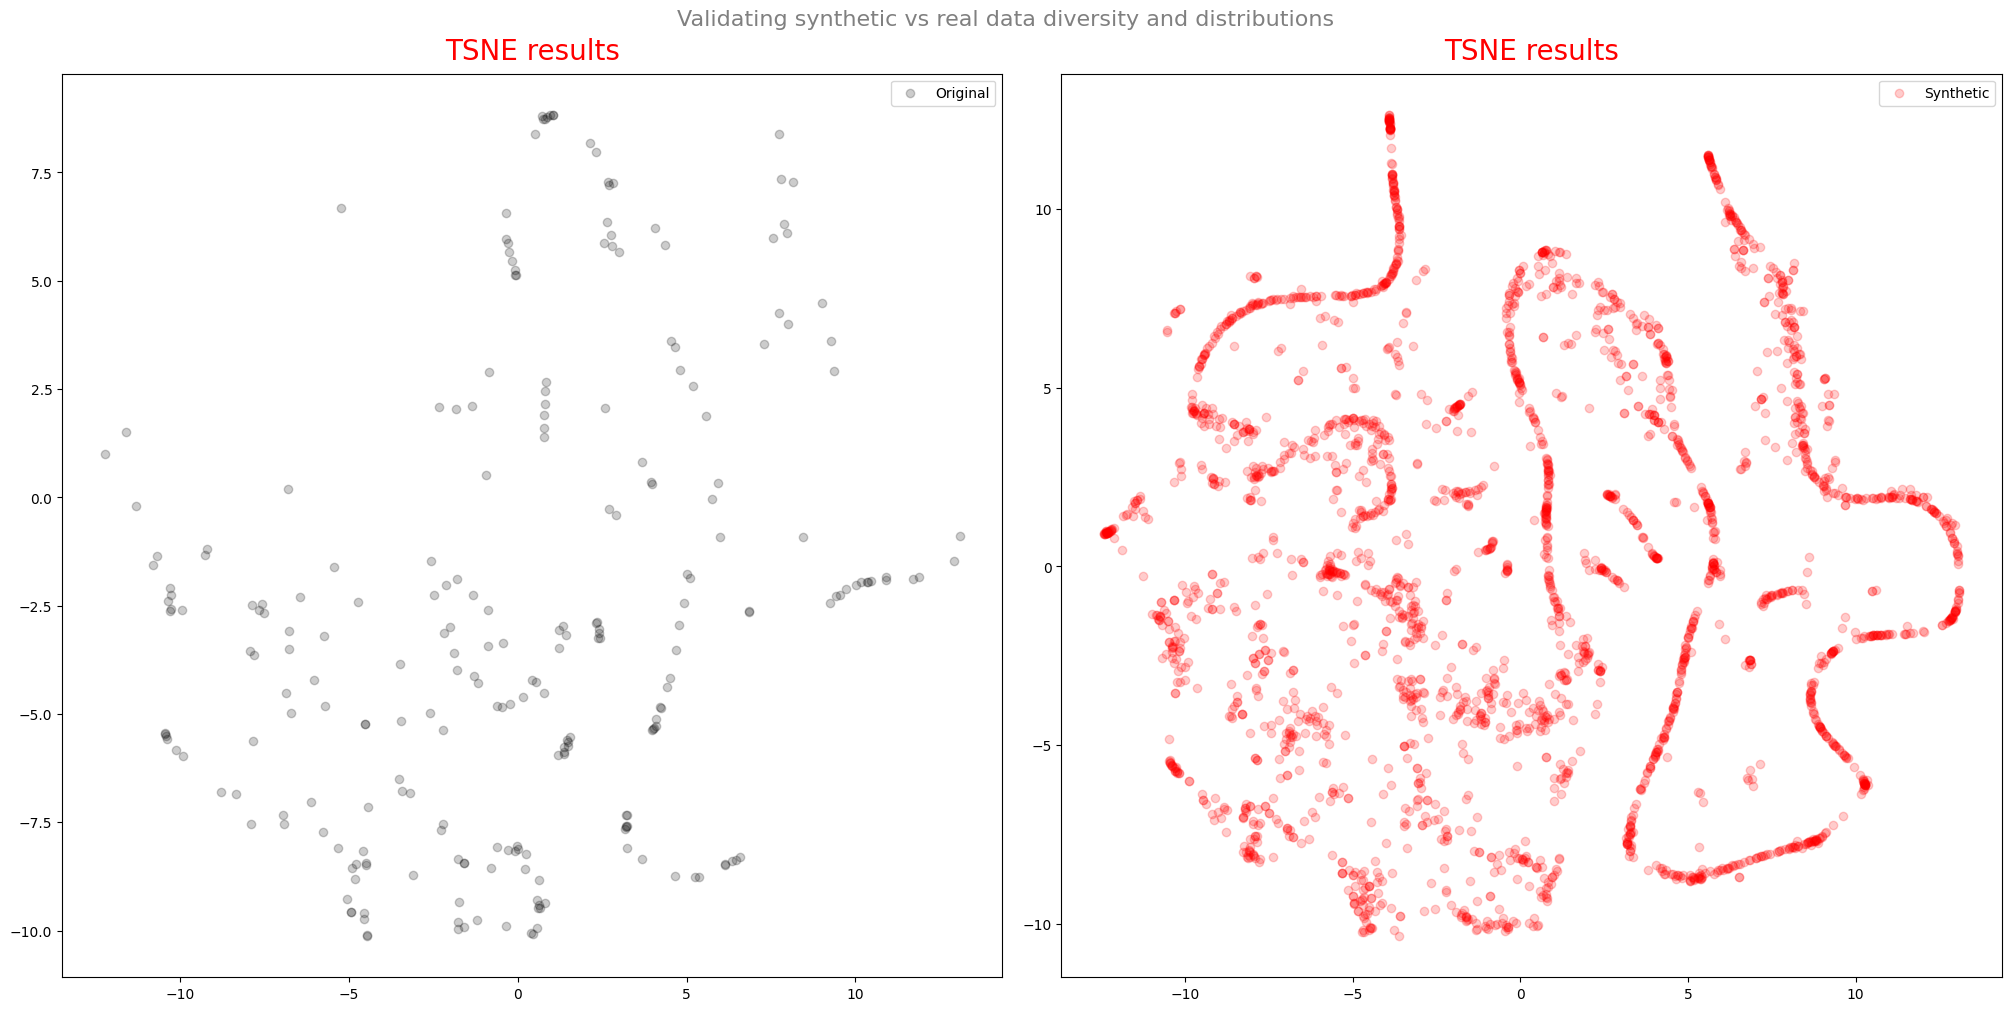

In [14]:
fig = plt.figure(constrained_layout=True, figsize=(20,10))
spec = gridspec.GridSpec(ncols=2, nrows=1, figure=fig)

#TSNE scatter plot
ax = fig.add_subplot(spec[0,0])
ax.set_title('TSNE results',
              fontsize=20,
              color='red',
              pad=10)

plt.scatter(tsne_results.iloc[:sample_size, 0].values, tsne_results.iloc[:sample_size,1].values,
            c='black', alpha=0.2, label='Original')


ax.legend()

fig.suptitle('Validating synthetic vs real data diversity and distributions',
             fontsize=16,
             color='grey')

ax2 = fig.add_subplot(spec[0,1])
ax2.set_title('TSNE results',
              fontsize=20,
              color='red',
              pad=10)


plt.scatter(tsne_results.iloc[sample_size:,0], tsne_results.iloc[sample_size:,1],
            c='red', alpha=0.2, label='Synthetic')

ax2.legend()

fig.suptitle('Validating synthetic vs real data diversity and distributions',
             fontsize=16,
             color='grey')